In [1]:
pip install pandas numpy scikit-learn tensorflow transformers matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
df = pd.read_csv("D:\Challenge 2\DT2\dt2 project dataset\Twitter_Data.csv")

In [3]:
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
5           kiya tho refresh maarkefir comment karo        0.0
6  surat women perform yagna seeks divine grace f...       0.0
7  this comes from cabinet which has scholars lik...       0.0
8  with upcoming election india saga going import...       1.0
9                         gandhi wa

In [4]:
import pandas as pd

# Assuming your DataFrame is named df
df.columns = ['tweet', 'sentiment_score']

# Add a new column 'sentiment'
df['sentiment'] = df['sentiment_score'].map({-1.0: 'negative', 0.0: 'neutral', 1.0: 'positive'})

# Drop the 'sentiment_score' column if you don't need it anymore
df = df[['tweet', 'sentiment']]

# Display the updated DataFrame
print(df.head())
print(df.info())

                                               tweet sentiment
0  when modi promised “minimum government maximum...  negative
1  talk all the nonsense and continue all the dra...   neutral
2  what did just say vote for modi  welcome bjp t...  positive
3  asking his supporters prefix chowkidar their n...  positive
4  answer who among these the most powerful world...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tweet      162976 non-null  object
 1   sentiment  162973 non-null  object
dtypes: object(2)
memory usage: 2.5+ MB
None


In [5]:
# Check for missing values
print(df.isnull().sum())


tweet        4
sentiment    7
dtype: int64


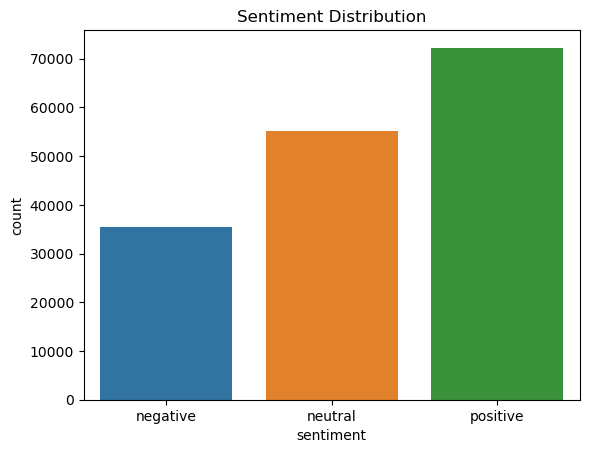

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Drop rows with missing values in 'sentiment' column
df = df.dropna(subset=['sentiment'])

# Visualize sentiment distribution
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


In [7]:
df['sentiment'].value_counts()


positive    72250
neutral     55213
negative    35510
Name: sentiment, dtype: int64

In [8]:
df.isnull().sum()


tweet        4
sentiment    0
dtype: int64

In [9]:
import re

def preprocess_text(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Add more preprocessing steps if needed
        return text
    else:
        return ""

df['clean_text'] = df['tweet'].apply(preprocess_text)


In [10]:
import nltk
# Download the Punkt resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91906\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
from nltk.tokenize import word_tokenize

df['tokens'] = df['clean_text'].apply(word_tokenize)


In [12]:
from nltk import FreqDist

all_words = [word for tokens in df['tokens'] for word in tokens]
freq_dist = FreqDist(all_words)
freq_dist.most_common(10)


[('modi', 155632),
 ('the', 104499),
 ('and', 67357),
 ('for', 52451),
 ('you', 38981),
 ('not', 30334),
 ('india', 29180),
 ('will', 28948),
 ('this', 28617),
 ('that', 28194)]

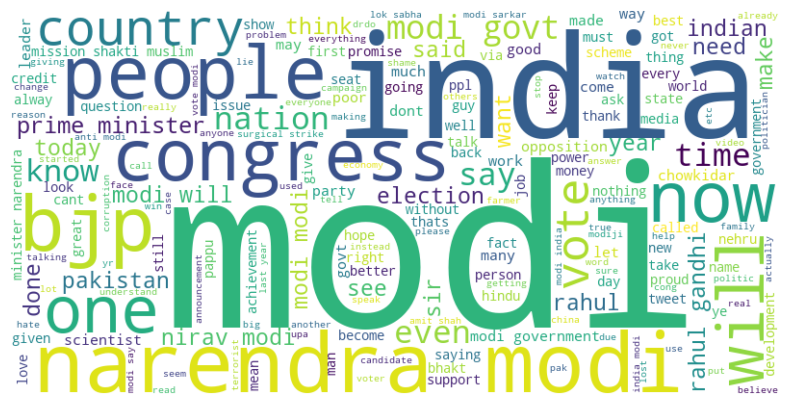

In [13]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [14]:
# Example: Text length feature
df['text_length'] = df['clean_text'].apply(len)


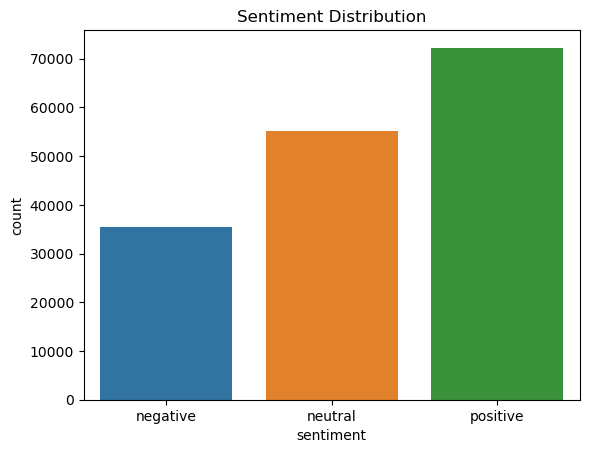

In [15]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


In [16]:
import pandas as pd
df1 = pd.read_csv(r"D:\Challenge 2\DT2\dt2 project dataset\twitter_validation.csv")
print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162973 entries, 0 to 162979
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   tweet        162969 non-null  object
 1   sentiment    162973 non-null  object
 2   clean_text   162973 non-null  object
 3   tokens       162973 non-null  object
 4   text_length  162973 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 7.5+ MB
None
                                               tweet sentiment  \
0  when modi promised “minimum government maximum...  negative   
1  talk all the nonsense and continue all the dra...   neutral   
2  what did just say vote for modi  welcome bjp t...  positive   
3  asking his supporters prefix chowkidar their n...  positive   
4  answer who among these the most powerful world...  positive   
5           kiya tho refresh maarkefir comment karo    neutral   
6  surat women perform yagna seeks divine grace f...   neutral   
7  this comes

In [17]:
# Assuming your DataFrame is named 'df'
selected_columns = df1.iloc[:, [2, 3]]  # Select columns at index 2 and 3

# Rename the columns for clarity
selected_columns.columns = ['tweet', 'sentiment']

# Display the resulting DataFrame
print(selected_columns)


          tweet                                          sentiment
0       Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
1      Negative  @Microsoft Why do I pay for WORD when it funct...
2      Negative  CSGO matchmaking is so full of closet hacking,...
3       Neutral  Now the President is slapping Americans in the...
4      Negative  Hi @EAHelp I’ve had Madeleine McCann in my cel...
..          ...                                                ...
994  Irrelevant  ⭐️ Toronto is the arts and culture capital of ...
995  Irrelevant  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996    Positive  Today sucked so it’s time to drink wine n play...
997    Positive  Bought a fraction of Microsoft today. Small wins.
998     Neutral  Johnson & Johnson to stop selling talc baby po...

[999 rows x 2 columns]


In [18]:
# Check for missing values
print(df1.isnull().sum())

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: i

In [19]:
print(df1.info())
print(df1.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

In [20]:
# Assuming your DataFrame is named 'df'
df1 = df1[['Irrelevant', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣']]

# Rename the columns for clarity
df1.columns = ['sentiment', 'tweet']

# Display the resulting DataFrame
print(df1)


      sentiment                                              tweet
0       Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
1      Negative  @Microsoft Why do I pay for WORD when it funct...
2      Negative  CSGO matchmaking is so full of closet hacking,...
3       Neutral  Now the President is slapping Americans in the...
4      Negative  Hi @EAHelp I’ve had Madeleine McCann in my cel...
..          ...                                                ...
994  Irrelevant  ⭐️ Toronto is the arts and culture capital of ...
995  Irrelevant  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996    Positive  Today sucked so it’s time to drink wine n play...
997    Positive  Bought a fraction of Microsoft today. Small wins.
998     Neutral  Johnson & Johnson to stop selling talc baby po...

[999 rows x 2 columns]


In [21]:
print(df1.info())
print(df1.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  999 non-null    object
 1   tweet      999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB
None
  sentiment                                              tweet
0   Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
1  Negative  @Microsoft Why do I pay for WORD when it funct...
2  Negative  CSGO matchmaking is so full of closet hacking,...
3   Neutral  Now the President is slapping Americans in the...
4  Negative  Hi @EAHelp I’ve had Madeleine McCann in my cel...
5  Positive  Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
6  Positive  Rocket League, Sea of Thieves or Rainbow Six: ...
7  Positive  my ass still knee-deep in Assassins Creed Odys...
8  Negative  FIX IT JESUS ! Please FIX IT ! What In the wor...
9  Positive  The professional dota 2 scene is fucking explo...


In [22]:
# Assuming your DataFrame is named 'df1'
df1 = df1[df1['sentiment'] != 'Irrelevant']

# Reset the index after filtering
df1.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(df1)


    sentiment                                              tweet
0     Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
1    Negative  @Microsoft Why do I pay for WORD when it funct...
2    Negative  CSGO matchmaking is so full of closet hacking,...
3     Neutral  Now the President is slapping Americans in the...
4    Negative  Hi @EAHelp I’ve had Madeleine McCann in my cel...
..        ...                                                ...
823  Negative  Please explain how this is possible! How can t...
824  Positive  Good on Sony. As much as I want to see the new...
825  Positive  Today sucked so it’s time to drink wine n play...
826  Positive  Bought a fraction of Microsoft today. Small wins.
827   Neutral  Johnson & Johnson to stop selling talc baby po...

[828 rows x 2 columns]


In [23]:
# Reorder the columns
df1 = df1[['tweet', 'sentiment']]

# Display the resulting DataFrame
print(df1)


                                                 tweet sentiment
0    BBC News - Amazon boss Jeff Bezos rejects clai...   Neutral
1    @Microsoft Why do I pay for WORD when it funct...  Negative
2    CSGO matchmaking is so full of closet hacking,...  Negative
3    Now the President is slapping Americans in the...   Neutral
4    Hi @EAHelp I’ve had Madeleine McCann in my cel...  Negative
..                                                 ...       ...
823  Please explain how this is possible! How can t...  Negative
824  Good on Sony. As much as I want to see the new...  Positive
825  Today sucked so it’s time to drink wine n play...  Positive
826  Bought a fraction of Microsoft today. Small wins.  Positive
827  Johnson & Johnson to stop selling talc baby po...   Neutral

[828 rows x 2 columns]


In [24]:
import re

def preprocess_text(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Add more preprocessing steps if needed
        return text
    else:
        return ""

df1['clean_text'] = df1['tweet'].apply(preprocess_text)


In [25]:
from nltk.tokenize import word_tokenize

df1['tokens'] = df1['clean_text'].apply(word_tokenize)

In [26]:
from nltk import FreqDist

all_words1 = [word for tokens in df1['tokens'] for word in tokens]
freq_dist = FreqDist(all_words)
freq_dist.most_common(10)


[('modi', 155632),
 ('the', 104499),
 ('and', 67357),
 ('for', 52451),
 ('you', 38981),
 ('not', 30334),
 ('india', 29180),
 ('will', 28948),
 ('this', 28617),
 ('that', 28194)]

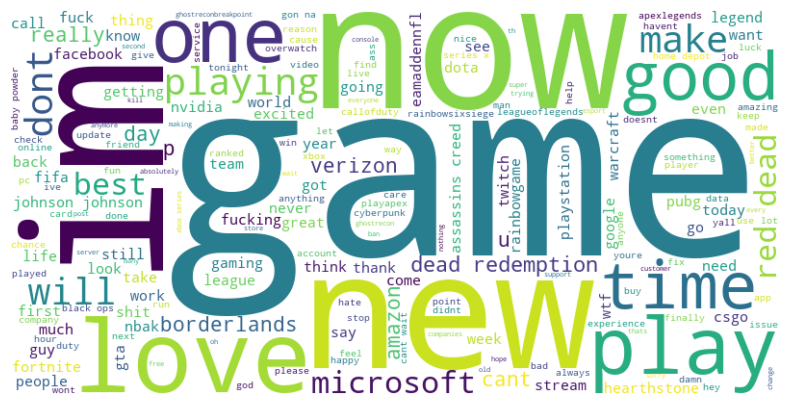

In [27]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(all_words1))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

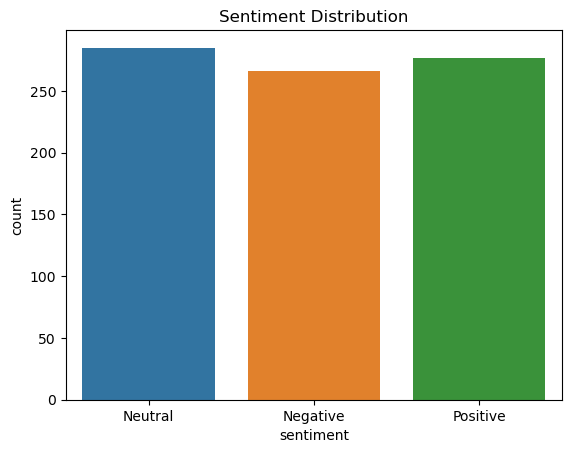

In [28]:
sns.countplot(x='sentiment', data=df1)
plt.title('Sentiment Distribution')
plt.show()


In [29]:
print(df)
print(df1)

                                                    tweet sentiment  \
0       when modi promised “minimum government maximum...  negative   
1       talk all the nonsense and continue all the dra...   neutral   
2       what did just say vote for modi  welcome bjp t...  positive   
3       asking his supporters prefix chowkidar their n...  positive   
4       answer who among these the most powerful world...  positive   
...                                                   ...       ...   
162975  why these 456 crores paid neerav modi not reco...  negative   
162976  dear rss terrorist payal gawar what about modi...  negative   
162977  did you cover her interaction forum where she ...   neutral   
162978  there big project came into india modi dream p...   neutral   
162979  have you ever listen about like gurukul where ...  positive   

                                               clean_text  \
0       when modi promised minimum government maximum ...   
1       talk all the nons

In [30]:
import pandas as pd

# Assuming df and df1 are your two dataframes
new_df = pd.concat([df, df1], ignore_index=True)

# Optional: Save the merged dataframe to a new CSV file
new_df.to_csv('combinedtweets_dataset.csv', index=False)


In [31]:
print(new_df)

                                                    tweet sentiment  \
0       when modi promised “minimum government maximum...  negative   
1       talk all the nonsense and continue all the dra...   neutral   
2       what did just say vote for modi  welcome bjp t...  positive   
3       asking his supporters prefix chowkidar their n...  positive   
4       answer who among these the most powerful world...  positive   
...                                                   ...       ...   
163796  Please explain how this is possible! How can t...  Negative   
163797  Good on Sony. As much as I want to see the new...  Positive   
163798  Today sucked so it’s time to drink wine n play...  Positive   
163799  Bought a fraction of Microsoft today. Small wins.  Positive   
163800  Johnson & Johnson to stop selling talc baby po...   Neutral   

                                               clean_text  \
0       when modi promised minimum government maximum ...   
1       talk all the nons

In [32]:
print(new_df.head(20))

                                                tweet sentiment  \
0   when modi promised “minimum government maximum...  negative   
1   talk all the nonsense and continue all the dra...   neutral   
2   what did just say vote for modi  welcome bjp t...  positive   
3   asking his supporters prefix chowkidar their n...  positive   
4   answer who among these the most powerful world...  positive   
5            kiya tho refresh maarkefir comment karo    neutral   
6   surat women perform yagna seeks divine grace f...   neutral   
7   this comes from cabinet which has scholars lik...   neutral   
8   with upcoming election india saga going import...  positive   
9                          gandhi was gay does modi    positive   
10  things like demonetisation gst goods and servi...  positive   
11  hope tuthukudi people would prefer honest well...  positive   
12                  calm waters wheres the modi wave   positive   
13  one vote can make all the difference anil kapo...   neutra

In [33]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91906\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91906\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\91906\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [34]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text_advanced(text):
    text = str(text).lower()  # Ensure text is a string
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    return tokens

new_df['tokens_advanced'] = new_df['clean_text'].apply(preprocess_text_advanced)


In [35]:
new_df[['clean_text', 'tokens_advanced']].head()


,clean_text,tokens_advanced
0,when modi promised minimum government maximum ...,"[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,"[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,"[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,"[asking, supporter, prefix, chowkidar, name, m..."
4,answer who among these the most powerful world...,"[answer, among, powerful, world, leader, today..."


In [36]:
# Drop rows with missing values in the 'clean_text' column
new_df = new_df.dropna(subset=['clean_text'])
# Drop duplicate rows based on 'clean_text'
new_df = new_df.drop_duplicates(subset=['clean_text'])


In [37]:
# Assuming new_df is your combined DataFrame
# Calculate text_length for rows where it is null
new_df.loc[new_df['text_length'].isnull(), 'text_length'] = new_df.loc[new_df['text_length'].isnull(), 'tweet'].apply(len)

# Verify that there are no more null values in 'text_length'
print(new_df['text_length'].isnull().sum())


0


In [38]:
# Assuming your DataFrame is named new_df
new_df['sentiment'] = new_df['sentiment'].str.lower()

# Mapping to combine similar classes
sentiment_mapping = {
    'positive': 'Positive',
    'neutral': 'Neutral',
    'negative': 'Negative'
}

new_df['sentiment'] = new_df['sentiment'].map(sentiment_mapping)

new_df.head(10)


,tweet,sentiment,clean_text,tokens,text_length,tokens_advanced
0,when modi promised “minimum government maximum...,Negative,when modi promised minimum government maximum ...,"[when, modi, promised, minimum, government, ma...",208.0,"[modi, promised, minimum, government, maximum,..."
1,talk all the nonsense and continue all the dra...,Neutral,talk all the nonsense and continue all the dra...,"[talk, all, the, nonsense, and, continue, all,...",68.0,"[talk, nonsense, continue, drama, vote, modi]"
2,what did just say vote for modi welcome bjp t...,Positive,what did just say vote for modi welcome bjp t...,"[what, did, just, say, vote, for, modi, welcom...",117.0,"[say, vote, modi, welcome, bjp, told, rahul, m..."
3,asking his supporters prefix chowkidar their n...,Positive,asking his supporters prefix chowkidar their n...,"[asking, his, supporters, prefix, chowkidar, t...",212.0,"[asking, supporter, prefix, chowkidar, name, m..."
4,answer who among these the most powerful world...,Positive,answer who among these the most powerful world...,"[answer, who, among, these, the, most, powerfu...",81.0,"[answer, among, powerful, world, leader, today..."
5,kiya tho refresh maarkefir comment karo,Neutral,kiya tho refresh maarkefir comment karo,"[kiya, tho, refresh, maarkefir, comment, karo]",40.0,"[kiya, tho, refresh, maarkefir, comment, karo]"
6,surat women perform yagna seeks divine grace f...,Neutral,surat women perform yagna seeks divine grace f...,"[surat, women, perform, yagna, seeks, divine, ...",76.0,"[surat, woman, perform, yagna, seek, divine, g..."
7,this comes from cabinet which has scholars lik...,Neutral,this comes from cabinet which has scholars lik...,"[this, comes, from, cabinet, which, has, schol...",84.0,"[come, cabinet, scholar, like, modi, smriti, h..."
8,with upcoming election india saga going import...,Positive,with upcoming election india saga going import...,"[with, upcoming, election, india, saga, going,...",156.0,"[upcoming, election, india, saga, going, impor..."
9,gandhi was gay does modi,Positive,gandhi was gay does modi,"[gandhi, was, gay, does, modi]",26.0,"[gandhi, gay, modi]"


In [39]:
small_df = new_df.sample(frac=0.1, random_state=42)
print(small_df)

                                                    tweet sentiment  \
112101  hello narendra modi jiyou must understand what...   Neutral   
91275   that percent people who said modi should inves...   Neutral   
138739  not irrelevant this govt fooling voters they c...  Negative   
21635   clear statement modi shah duo wont able wriggl...  Positive   
99112   main bhi chowkidar song sid chandra for narend...  Positive   
...                                                   ...       ...   
8963    prime minister narendra modi arrives bjp headq...   Neutral   
39140   this true indian culture adopted all over than...  Positive   
126410  chal chutiye chowkidar kaheen kbow how much ri...  Positive   
121524  raga economic advisor says indian economy has ...  Positive   
116452       now faces the possibility extradition india    Neutral   

                                               clean_text  \
112101  hello narendra modi jiyou must understand what...   
91275   that percent peop

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Assuming small_df is your smaller dataset
vectorizer = TfidfVectorizer()
X_small = vectorizer.fit_transform(small_df['clean_text'])
y_small = small_df['sentiment']

# Splitting the smaller dataset
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.2, random_state=42)




In [41]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

model = SVC()
model.fit(X_train_small, y_train_small)

# Model Evaluation
y_pred_small = model.predict(X_test_small)
print("Accuracy:", accuracy_score(y_test_small, y_pred_small))
print("Classification Report:\n", classification_report(y_test_small, y_pred_small))

Accuracy: 0.7883792048929663
Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.48      0.62       716
     Neutral       0.75      0.89      0.81      1115
    Positive       0.80      0.86      0.83      1439

    accuracy                           0.79      3270
   macro avg       0.81      0.74      0.75      3270
weighted avg       0.80      0.79      0.78      3270



In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
small_df = new_df.sample(n=5000, random_state=42)
# Assuming small_df is your smaller dataset
vectorizer = TfidfVectorizer()
X_small = vectorizer.fit_transform(small_df['clean_text'])
y_small = small_df['sentiment']

# Splitting the smaller dataset
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, y_small, test_size=0.2, random_state=42)




In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Define a smaller parameter grid
param_dist = {'C': [0.1, 1], 'kernel': ['linear', 'rbf']}

# Create the SVM model
svm_model = SVC()

# Use RandomizedSearchCV
random_search = RandomizedSearchCV(svm_model, param_distributions=param_dist, n_iter=5, cv=5, scoring='accuracy', n_jobs=-1)
random_search.fit(X_train_small, y_train_small)

# Get the best parameters
best_params_random = random_search.best_params_
print("Best Parameters (RandomizedSearchCV):", best_params_random)



# Train the model with the best parameters on the full dataset
best_model_random = SVC(**best_params_random)
best_model_random.fit(X_train_small, y_train_small)

# Model Evaluation
y_pred_small_random = best_model_random.predict(X_test_small)
print("Accuracy:", accuracy_score(y_test_small, y_pred_small_random))
print("Classification Report:\n", classification_report(y_test_small, y_pred_small_random))


C:\Users\91906\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters (RandomizedSearchCV): {'kernel': 'linear', 'C': 1}
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

    Negative       0.71      0.47      0.56       208
     Neutral       0.73      0.80      0.76       355
    Positive       0.76      0.82      0.79       437

    accuracy                           0.74      1000
   macro avg       0.73      0.70      0.71      1000
weighted avg       0.74      0.74      0.73      1000



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 'sigmoid'],
}

# Create an SVC model
svm_model = SVC()

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_small, y_train_small)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters on the full dataset
best_model = SVC(**best_params)
best_model.fit(X_train_small, y_train_small)

# Model Evaluation
y_pred_full = best_model.predict(X_test_small)
print("Accuracy:", accuracy_score(y_test_small, y_pred_full))
print("Classification Report:\n", classification_report(y_test_small, y_pred_full))


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize empty lists to accumulate predictions and labels
all_labels = []
all_predictions = []

# Assuming df is your dataframe with 16800 entries
# Adjust batch_size based on your computational resources
batch_size = 10000

# Vectorization using TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(new_df['clean_text'])
y = new_df['sentiment']

# Splitting the dataset for batch processing
for i in range(0, X.shape[0], batch_size):
    X_batch = X[i:i+batch_size]
    y_batch = y[i:i+batch_size]

    # Model Training (using SVM as an example)
    model = SVC()
    model.fit(X_batch, y_batch)
    
    # Model Prediction
    y_pred_batch = model.predict(X_batch)
    
    # Accumulate predictions and ground truth labels
    all_predictions.extend(y_pred_batch)
    all_labels.extend(y_batch)


    # Model Evaluation (if needed)
    X_test = vectorizer.transform(new_df['clean_text'])  # Assuming you have a test set (test_df)
    y_test = new_df['sentiment']

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Batch {i}-{i+batch_size - 1} - Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
# Once the loop completes, you have a trained model on the full dataset

Batch 0-9999 - Accuracy: 0.7564
Classification Report:
               precision    recall  f1-score   support

    Negative       0.85      0.43      0.57     35738
     Neutral       0.71      0.86      0.78     55346
    Positive       0.78      0.83      0.80     72411

    accuracy                           0.76    163495
   macro avg       0.78      0.71      0.72    163495
weighted avg       0.77      0.76      0.75    163495

Batch 10000-19999 - Accuracy: 0.7631
Classification Report:
               precision    recall  f1-score   support

    Negative       0.87      0.44      0.59     35738
     Neutral       0.71      0.88      0.78     55346
    Positive       0.79      0.83      0.81     72411

    accuracy                           0.76    163495
   macro avg       0.79      0.72      0.73    163495
weighted avg       0.78      0.76      0.75    163495

Batch 20000-29999 - Accuracy: 0.7511
Classification Report:
               precision    recall  f1-score   support

    N

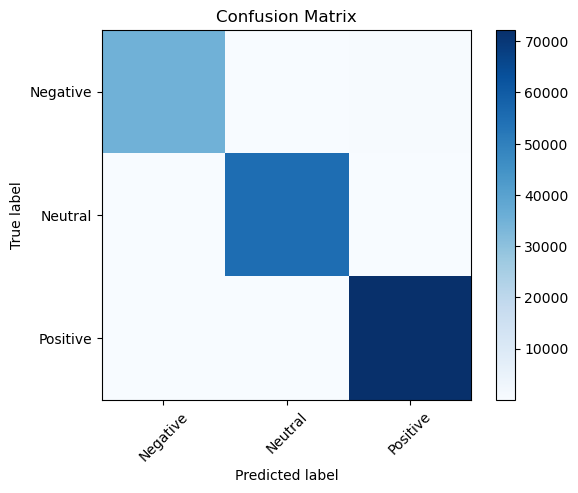

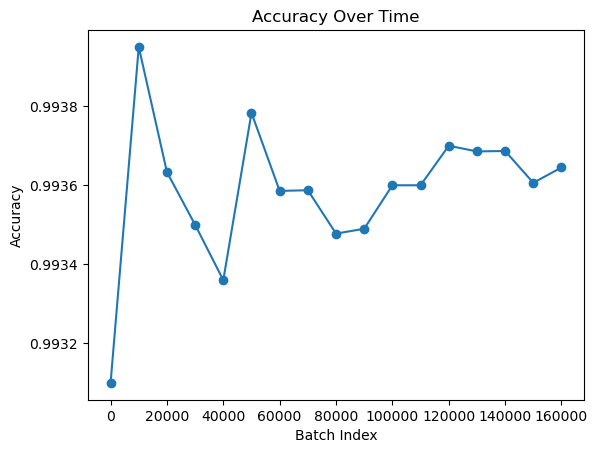

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming all_predictions and all_labels are your accumulated predictions and ground truth labels

# Create a confusion matrix plot
conf_matrix = confusion_matrix(all_labels, all_predictions)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(all_labels)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Plot overall accuracy over time
batch_indices = np.arange(0, X.shape[0], batch_size)
accuracies = []

for i in range(len(batch_indices)):
    batch_end = min(batch_indices[i] + batch_size, X.shape[0])
    current_predictions = all_predictions[:batch_end]
    current_labels = all_labels[:batch_end]
    current_accuracy = accuracy_score(current_labels, current_predictions)
    accuracies.append(current_accuracy)

plt.plot(batch_indices, accuracies, marker='o')
plt.title('Accuracy Over Time')
plt.xlabel('Batch Index')
plt.ylabel('Accuracy')
plt.show()


In [46]:
import joblib
joblib.dump(model, 'trained_svm_model.joblib')

['trained_svm_model.joblib']

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load new dataset (assuming it's in CSV format)
new_df = pd.read_csv(r"D:\Challenge 2\DT2\Book1.csv")  # Replace with your actual file path
new_clean_texts = new_df['review'].values
new_labels = new_df['sentiment'].values

# Vectorize using the same TF-IDF vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_new = vectorizer.fit_transform(new_clean_texts)

# Load the previously trained SVM model (if saved) or train a new one for demonstration
# Here, we'll retrain for simplicity
model_svm = SVC()
model_svm.fit(X_new, new_labels)

# Predict and evaluate
y_pred_new_svm = model_svm.predict(X_new)
accuracy_new_svm = accuracy_score(new_labels, y_pred_new_svm)
report_new_svm = classification_report(new_labels, y_pred_new_svm)

print("SVM Model on New Dataset")
print("Accuracy:", accuracy_new_svm)
print("Classification Report:\n", report_new_svm)


SVM Model on New Dataset
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      1.00      1.00      2531
    positive       1.00      1.00      1.00      2468

    accuracy                           1.00      4999
   macro avg       1.00      1.00      1.00      4999
weighted avg       1.00      1.00      1.00      4999

